<a href="https://colab.research.google.com/github/Johndola58/Johndola58/blob/main/ML%20Assignment%20group%2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#Import/install the necessary packages
import pandas as pd

In [4]:
#Get the data from Google Drive
df = pd.read_csv("/content/Employee_Attrition_Data_1.csv") 
print(df.info(),'\n')
print(df.head(),'\n')
print(df.describe(),'\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   promotion_last_5years  14999 non-null  int64  
 7   Department             14999 non-null  object 
 8   salary                 14999 non-null  object 
 9   Attrition              14999 non-null  int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB
None 

   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86

In [5]:
#Calculate summary statistics for categorical data

In [6]:
for col in df.select_dtypes(include='object').columns:
    print(f"{col}:\n{df[col].value_counts()}\n")

Department:
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: Department, dtype: int64

salary:
low       7316
medium    6446
high      1237
Name: salary, dtype: int64



In [7]:
#Drop unnecessary features

In [8]:
df.drop(['Department'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   promotion_last_5years  14999 non-null  int64  
 7   salary                 14999 non-null  object 
 8   Attrition              14999 non-null  int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 1.0+ MB


In [9]:
#Missing Data: Fill missing values with the mean for numerical columns

In [10]:
for col in df.select_dtypes(include=['int', 'float']).columns:
    df[col].fillna(df[col].mean(), inplace=True)
    
print(df.describe(),'\n')

       satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident  \
count          14999.000000        14999.000000   14999.000000   
mean             201.050337            3.498233       0.144610   
std               49.943099            1.460136       0.351719   
min               96.000000            2.000000       0.000000   
25%              156.000000            3.000000       0.000000   
50%              200.000000            3.0000

In [11]:
#Missing Data: Fill missing values with the mode for categorical columns

In [12]:
for col in df.select_dtypes(include='object').columns:
    df[col].fillna(df[col].mode()[0], inplace=True)
    print(df.describe(),'\n')

       satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident  \
count          14999.000000        14999.000000   14999.000000   
mean             201.050337            3.498233       0.144610   
std               49.943099            1.460136       0.351719   
min               96.000000            2.000000       0.000000   
25%              156.000000            3.000000       0.000000   
50%              200.000000            3.0000

In [13]:
from tabulate import tabulate

In [14]:
# print the output of df.describe() in a table format
print(tabulate(df.describe(), headers='keys', tablefmt='psql'))

+-------+----------------------+-------------------+------------------+------------------------+----------------------+-----------------+-------------------------+--------------+
|       |   satisfaction_level |   last_evaluation |   number_project |   average_montly_hours |   time_spend_company |   Work_accident |   promotion_last_5years |    Attrition |
|-------+----------------------+-------------------+------------------+------------------------+----------------------+-----------------+-------------------------+--------------|
| count |         14999        |      14999        |      14999       |             14999      |          14999       |    14999        |           14999         | 14999        |
| mean  |             0.612834 |          0.716102 |          3.80305 |               201.05   |              3.49823 |        0.14461  |               0.0212681 |     0.238083 |
| std   |             0.248631 |          0.171169 |          1.23259 |                49.9431 |         

In [15]:
# write the output of df.describe() to an Excel file
with pd.ExcelWriter('output.xlsx') as writer:
    df.describe().to_excel(writer, sheet_name='Summary')

# read the Excel file back in and print the contents
df_excel = pd.read_excel('output.xlsx', sheet_name='Summary')
print(df_excel)

  Unnamed: 0  satisfaction_level  last_evaluation  number_project  \
0      count        14999.000000     14999.000000    14999.000000   
1       mean            0.612834         0.716102        3.803054   
2        std            0.248631         0.171169        1.232592   
3        min            0.090000         0.360000        2.000000   
4        25%            0.440000         0.560000        3.000000   
5        50%            0.640000         0.720000        4.000000   
6        75%            0.820000         0.870000        5.000000   
7        max            1.000000         1.000000        7.000000   

   average_montly_hours  time_spend_company  Work_accident  \
0          14999.000000        14999.000000   14999.000000   
1            201.050337            3.498233       0.144610   
2             49.943099            1.460136       0.351719   
3             96.000000            2.000000       0.000000   
4            156.000000            3.000000       0.000000   
5     

In [16]:
import pandas as pd

In [17]:
# write the output of df.describe() to a CSV file
df.describe().to_csv('output.csv', index=True)

In [18]:
#Calculate summary statistics for categorical data

In [19]:
for col in df.select_dtypes(include='object').columns:
    print(f"{col}:\n{df[col].value_counts()}\n")

salary:
low       7316
medium    6446
high      1237
Name: salary, dtype: int64



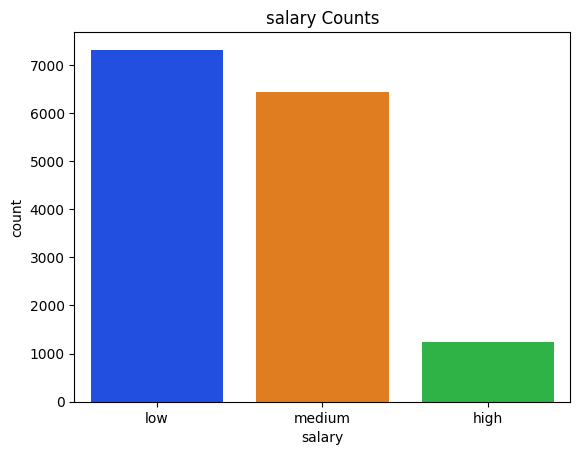

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# loop through each categorical column
for col in df.select_dtypes(include='object').columns:
    # create a countplot with a different color for each unique value
    sns.countplot(x=col, data=df, palette=sns.color_palette("bright", len(df[col].unique())))
    plt.title(f"{col} Counts")
    
    plt.show()


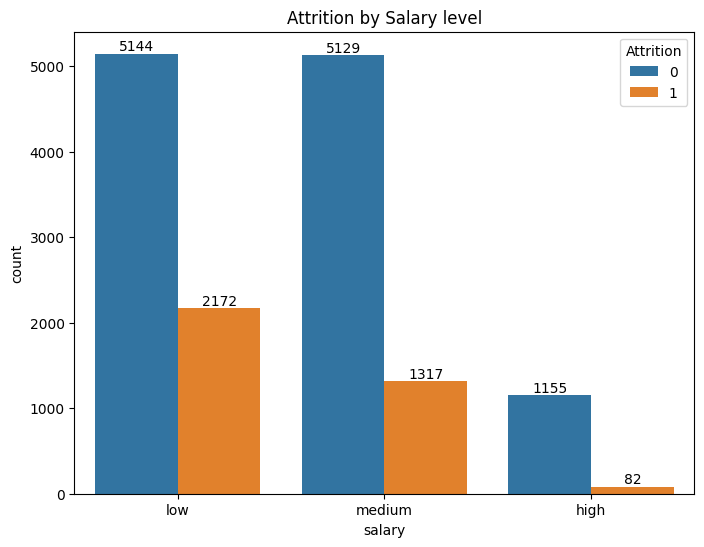

In [21]:
plt.figure(figsize=(8,6))
ax = sns.countplot(x='salary', hue='Attrition', data=df)
plt.title("Attrition by Salary level")

# iterate over the bars
for p in ax.containers:
    # iterate over the values of each bar
    for q in p.patches:
        # get the height of the bar
        height = q.get_height()
        # add the label to the bar
       # ax.text(q.get_x() + q.get_width() / 2, height + 5, height, ha='center')
        # add data labels to the bar chart
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10)
        
plt.show()

In [22]:
#Display a box plot for satisfaction_level     

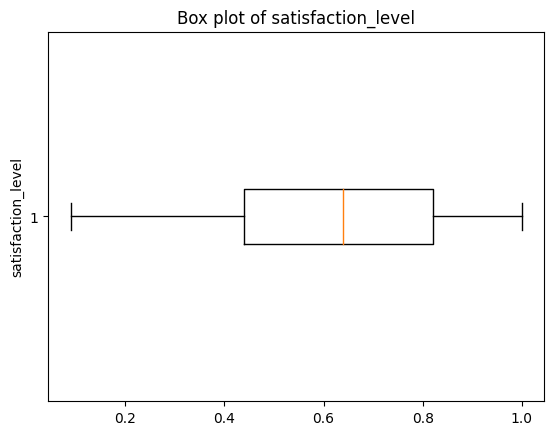

count    14999.000000
mean         0.612834
std          0.248631
min          0.090000
25%          0.440000
50%          0.640000
75%          0.820000
max          1.000000
Name: satisfaction_level, dtype: float64 



In [23]:
import matplotlib.pyplot as plt

plt.boxplot(df['satisfaction_level'],vert=False)
plt.title('Box plot of satisfaction_level')
plt.ylabel('satisfaction_level')
plt.show()
print(df.satisfaction_level.describe(),'\n')

In [24]:
#Removing Outliers: To remove outliers, use a method like Z-score or IQR to detect and remove the extreme values

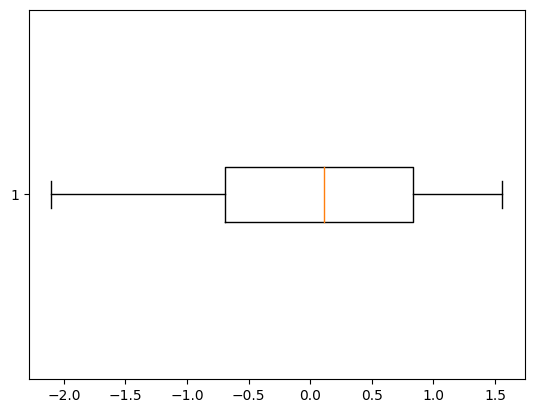

In [25]:
from scipy import stats

# Calculate Z-score for satisfaction_level column
z_scores = stats.zscore(df['satisfaction_level'])
plt.boxplot(z_scores,vert=False)

# Reatin rows with Z-score greater than -3 or less than +3
df = df[(z_scores >= -3) & (z_scores <= 3)]

In [26]:
#Display the box plot again

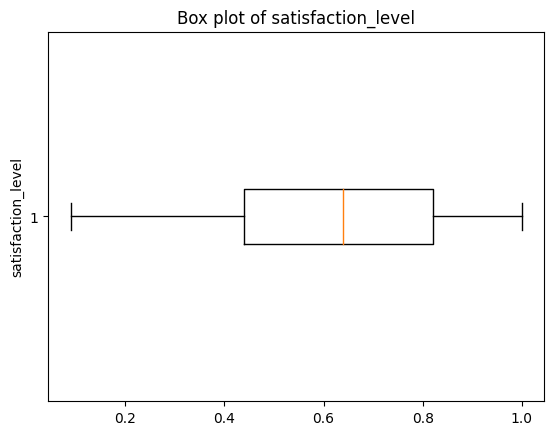

count    14999.000000
mean         0.612834
std          0.248631
min          0.090000
25%          0.440000
50%          0.640000
75%          0.820000
max          1.000000
Name: satisfaction_level, dtype: float64 



In [27]:
plt.boxplot(df['satisfaction_level'],vert=False)
plt.title('Box plot of satisfaction_level')
plt.ylabel('satisfaction_level')
plt.show()
print(df.satisfaction_level.describe(),'\n')

In [28]:
#Display a box plot for last_evaluation

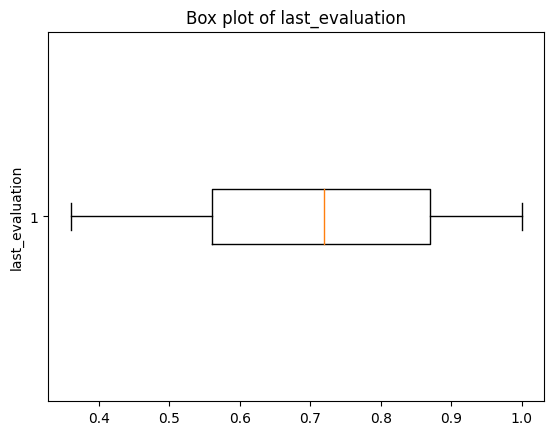

count    14999.000000
mean         0.716102
std          0.171169
min          0.360000
25%          0.560000
50%          0.720000
75%          0.870000
max          1.000000
Name: last_evaluation, dtype: float64 



In [29]:
plt.boxplot(df['last_evaluation'],vert=False)
plt.title('Box plot of last_evaluation')
plt.ylabel('last_evaluation')
plt.show()
print(df.last_evaluation.describe(),'\n')

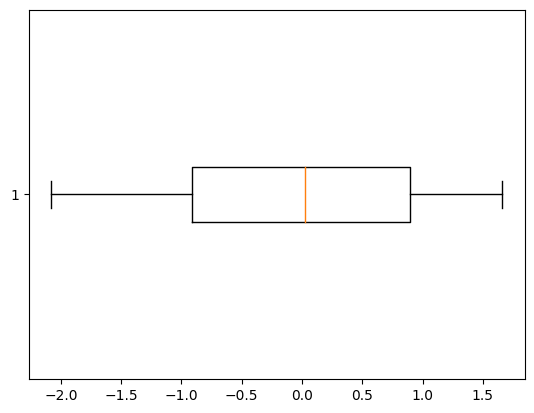

In [30]:
# Calculate Z-score for satisfaction_level column
z_scores = stats.zscore(df['last_evaluation'])
plt.boxplot(z_scores,vert=False)

# Reatin rows with Z-score greater than -3 or less than +3
df = df[(z_scores >= -3) & (z_scores <= 3)]

In [31]:
#Display the box plot again

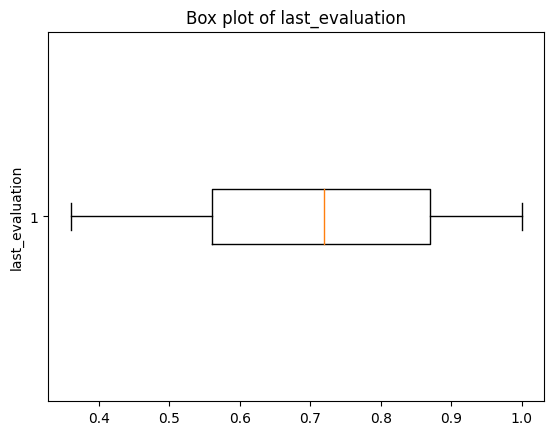

count    14999.000000
mean         0.716102
std          0.171169
min          0.360000
25%          0.560000
50%          0.720000
75%          0.870000
max          1.000000
Name: last_evaluation, dtype: float64 



In [32]:
plt.boxplot(df['last_evaluation'],vert=False)
plt.title('Box plot of last_evaluation')
plt.ylabel('last_evaluation')
plt.show()
print(df.last_evaluation.describe(),'\n')

In [33]:
print(df.describe(),'\n')

       satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident  \
count          14999.000000        14999.000000   14999.000000   
mean             201.050337            3.498233       0.144610   
std               49.943099            1.460136       0.351719   
min               96.000000            2.000000       0.000000   
25%              156.000000            3.000000       0.000000   
50%              200.000000            3.0000

In [34]:

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14999 entries, 0 to 14998
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   promotion_last_5years  14999 non-null  int64  
 7   salary                 14999 non-null  object 
 8   Attrition              14999 non-null  int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 1.1+ MB


<ipython-input-35-e72c6a7e07f9>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_no_attrition.corr(), annot=True)


<Axes: >

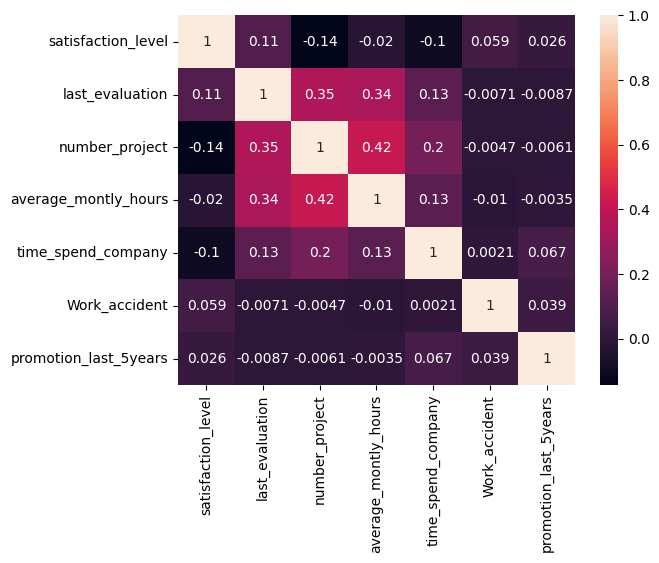

In [35]:
df_no_attrition = df.drop('Attrition', axis=1)
sns.heatmap(df_no_attrition.corr(), annot=True)

In [36]:
sns.heatmap(df.corr(), annot=True, cmap='Blues', ax=ax)

<ipython-input-36-4a00c169c9bc>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='Blues', ax=ax)


<Axes: title={'center': 'Attrition by Salary level'}>

In [37]:
#Convert the categorical variables to dummy variables

In [38]:
df = pd.get_dummies(df, drop_first=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14999 entries, 0 to 14998
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   promotion_last_5years  14999 non-null  int64  
 7   Attrition              14999 non-null  int64  
 8   salary_high            14999 non-null  uint8  
 9   salary_low             14999 non-null  uint8  
 10  salary_medium          14999 non-null  uint8  
dtypes: float64(2), int64(6), uint8(3)
memory usage: 1.1 MB


In [39]:
print(df.columns)
print(df.describe())

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'Attrition', 'salary_high', 'salary_low',
       'salary_medium'],
      dtype='object')
       satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident  \
count          14999.000000        14999.000000   14999.000000   
mean             201.050337            3.498233     

<Axes: >

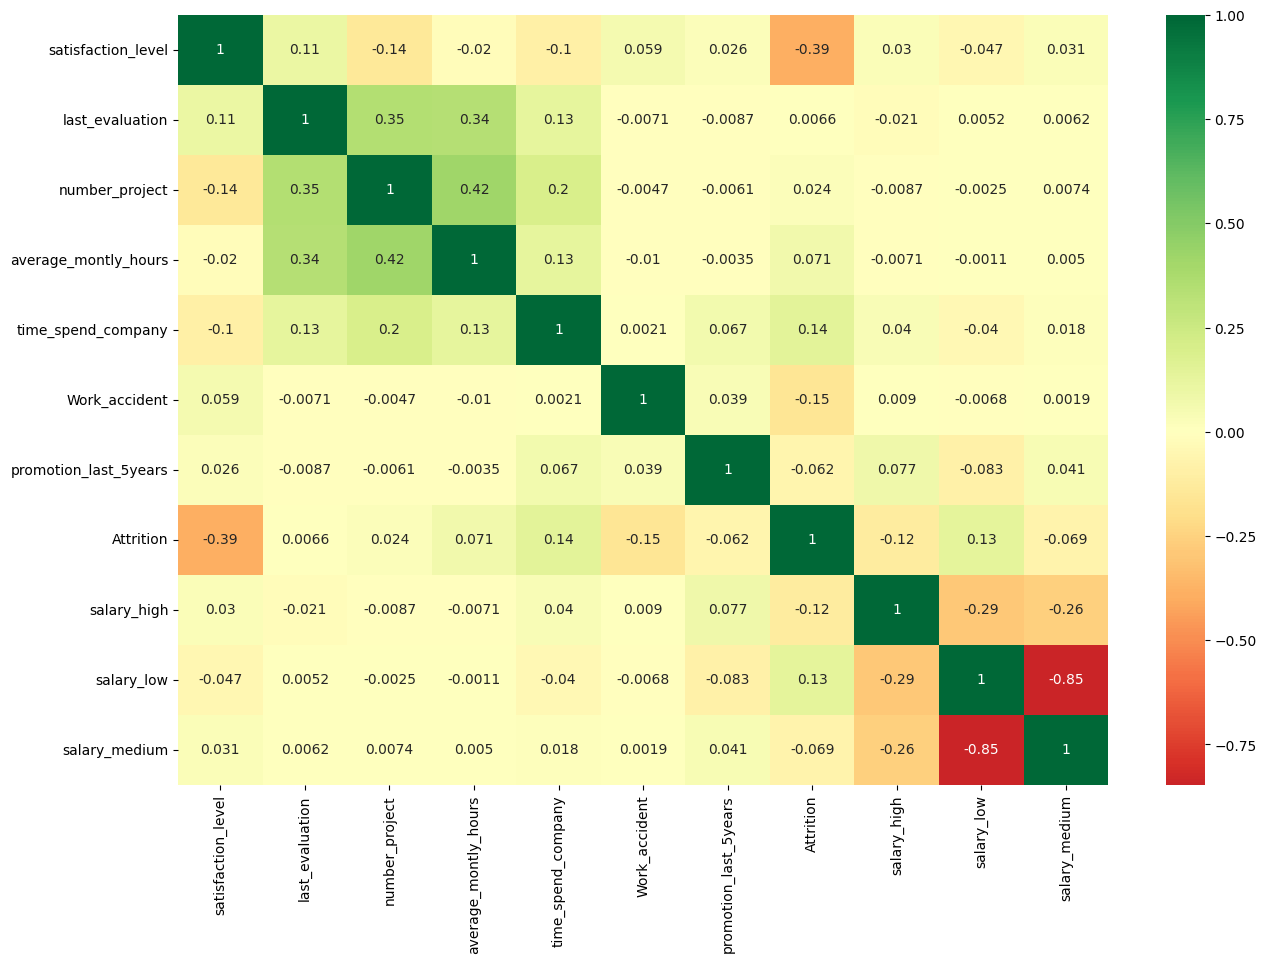

In [40]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn',center=0)

In [41]:
sns.heatmap(df.corr(), annot=True, cmap='Blues', ax=ax)

<Axes: title={'center': 'Attrition by Salary level'}>

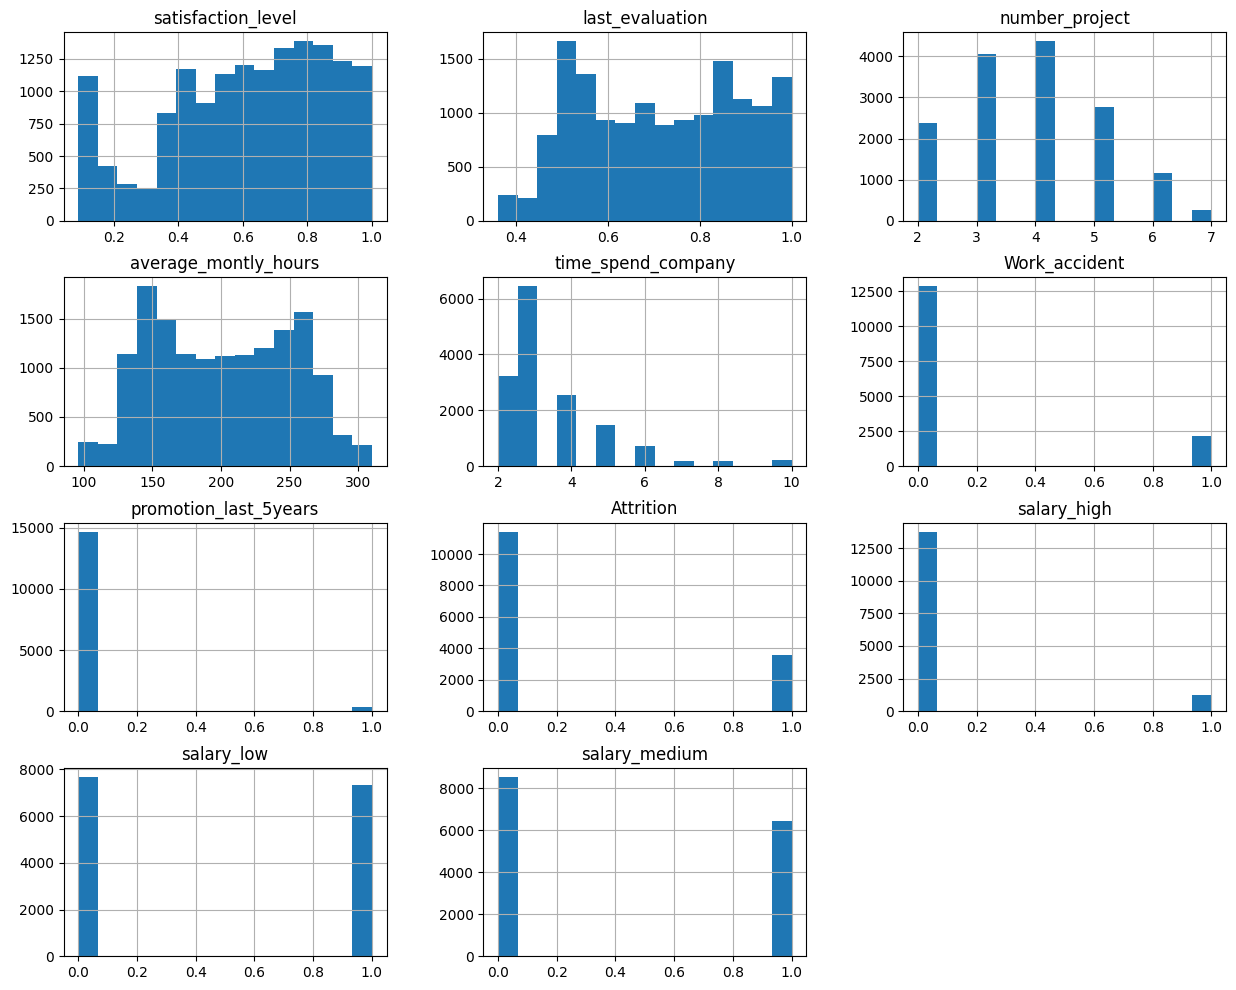

In [42]:
df.hist(figsize=(15,12),bins = 15)
plt.title("Features Distribution")
plt.show()

In [43]:
import seaborn as sns

In [44]:
#Standardisation

In [45]:
#Split the data into training and test sets (80:20)

In [46]:
from sklearn.model_selection import train_test_split
                                                                                                                                                               
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(['Attrition'], axis=1), df[['Attrition']], test_size=0.2, random_state=50)
                                                                                                              

In [47]:
#Import/install the necessary packages

In [48]:
!pip install scikeras
import scikeras as sk
from sklearn.metrics import mean_squared_error, r2_score
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
#from scikeras.wrappers import KerasRegressor
#from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [49]:
#Model architecture and creation

In [50]:
# define model architecture
def create_model_classification(optimizer='adam'):
    model = Sequential()
    model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
# create the model
model = KerasClassifier(build_fn=create_model_classification, verbose=0)
print(model)

KerasClassifier(
	model=None
	build_fn=<function create_model_classification at 0x7fbfbef328c0>
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=None
	validation_batch_size=None
	verbose=0
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=1
	class_weight=None
)


In [51]:
#Finding the best parameters using grid search

In [52]:
from sklearn.metrics import accuracy_score, make_scorer

In [53]:

# Define the scoring metric as accuracy
scorer = make_scorer(accuracy_score)

In [54]:
scorer

make_scorer(accuracy_score)

In [55]:
# Define the grid search parameters
param_grid = {'batch_size': [32, 64],
              'epochs': [50, 100]
             }

In [56]:
print(y_train)

       Attrition
9517           0
14334          1
11410          0
5914           0
11993          0
...          ...
10206          0
6253           0
10123          0
5600           0
14000          0

[11999 rows x 1 columns]


In [57]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.transform(y_test)

In [58]:
# Perform grid search to find the best hyperparameters

In [59]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, scoring=scorer)
grid_result = grid.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


In [60]:
print(f"Best Parameters: {grid_result.best_params_}")

Best Parameters: {'batch_size': 32, 'epochs': 100}


In [61]:
# Perform grid search to find the best hyperparameters
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, scoring=scorer)
grid_result = grid.fit(X_train, y_train)

# Print the best parameters
print(f"Best Parameters: {grid_result.best_params_}")

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


Best Parameters: {'batch_size': 32, 'epochs': 100}


In [62]:
#Fit the model with the best hyperparameters and make predictions using the test set

In [63]:
best_model = grid.best_estimator_
best_model.fit(X_train, y_train, epochs=grid.best_params_['epochs'], batch_size=grid.best_params_['batch_size'], verbose=0, callbacks=[EarlyStopping(patience=10, restore_best_weights=True)])

y_pred = best_model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


In [64]:
#Print the confusion matrix and performance metrics (classification report)

In [65]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[2181   89]
 [ 130  600]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      2270
           1       0.87      0.82      0.85       730

    accuracy                           0.93      3000
   macro avg       0.91      0.89      0.90      3000
weighted avg       0.93      0.93      0.93      3000



In [66]:
#Display Feature Importance

In [67]:
import numpy as np
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

In [68]:
def permutation_feature_importance(model, X, y, metric='accuracy', num_permutations=1000):
    baseline_score = model.score(X, y)
    feature_importances = []
    for feature in X.columns:
        X_permuted = X.copy()
        X_permuted[feature] = np.random.permutation(X_permuted[feature])
        permuted_score = model.score(X_permuted, y)
        feature_importances.append(baseline_score - permuted_score)
    sorted_importances = sorted(zip(feature_importances, X.columns), reverse=True)
    importances, features = zip(*sorted_importances)
    plt.barh(features, importances)
    plt.xlabel(f"Importance ({metric})")
    plt.show()

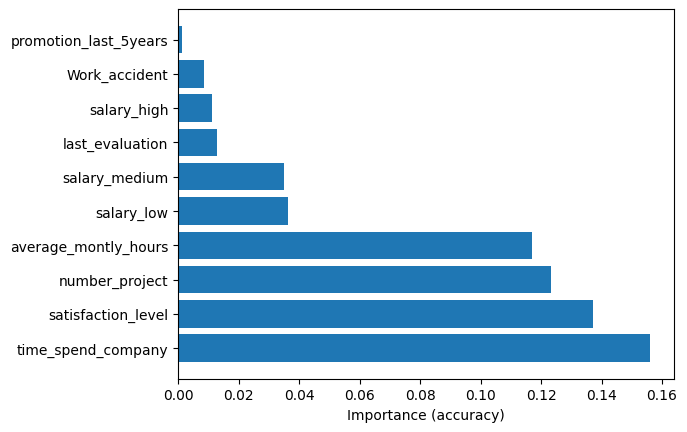

In [69]:
permutation_feature_importance(best_model, X_train, y_train)

In [70]:
def plot_permutation_importance(best_model, X_train, y_train):
    from sklearn.inspection import permutation_importance
    
    # calculate permutation feature importance
    result = permutation_importance(best_model, X_train, y_train, n_repeats=10, random_state=0, n_jobs=-1)
    feature_importances = pd.Series(result.importances_mean, index=X_train.columns)

    # plot the feature importances as a horizontal bar chart
    feature_importances.sort_values(ascending=False, inplace=True)
    feature_importances.plot(kind='barh')
    
    # return feature importances as a pandas Series object
    return feature_importances


time_spend_company       0.154213
satisfaction_level       0.139153
number_project           0.122277
average_montly_hours     0.117860
salary_low               0.036211
salary_medium            0.036086
last_evaluation          0.011501
salary_high              0.011193
Work_accident            0.007376
promotion_last_5years    0.000742
dtype: float64


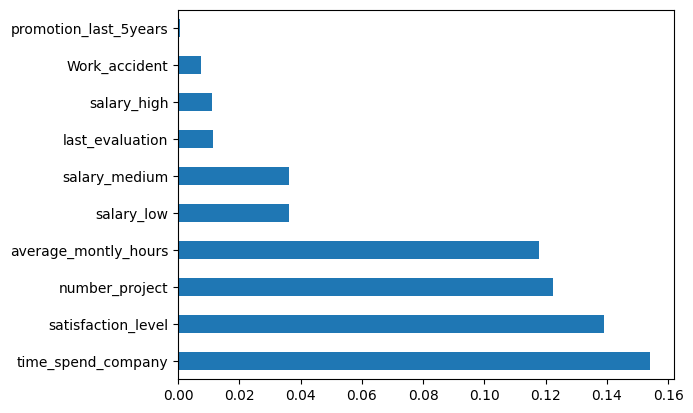

In [71]:
importances = plot_permutation_importance(best_model, X_train, y_train)
print(importances)


In [72]:
param_grid = {'batch_size': [32, 64, 128],
              'epochs': [50, 100, 150],
              }
     

In [73]:
# define model architecture
def create_model_classification(optimizer='adam'):
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
# create the model
model = KerasClassifier(build_fn=create_model_classification, verbose=0)
print(model)

KerasClassifier(
	model=None
	build_fn=<function create_model_classification at 0x7fbfbc3fd990>
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=None
	validation_batch_size=None
	verbose=0
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=1
	class_weight=None
)


In [74]:
# Define the scoring metric as accuracy
scorer = make_scorer(accuracy_score)

In [75]:
# Define the grid search parameters
param_grid = {'batch_size': [32, 64],
              'epochs': [50, 100]
      }

In [76]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.transform(y_test)

In [77]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, scoring=scorer)
grid_result = grid.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


In [78]:
print(f"Best Parameters: {grid_result.best_params_}")

Best Parameters: {'batch_size': 32, 'epochs': 100}


In [79]:
best_model = grid.best_estimator_
best_model.fit(X_train, y_train, epochs=grid.best_params_['epochs'], batch_size=grid.best_params_['batch_size'], verbose=0, callbacks=[EarlyStopping(patience=10, restore_best_weights=True)])

y_pred = best_model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


In [80]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[2177   93]
 [  70  660]]
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      2270
           1       0.88      0.90      0.89       730

    accuracy                           0.95      3000
   macro avg       0.92      0.93      0.93      3000
weighted avg       0.95      0.95      0.95      3000



In [81]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

Text(0.5, 23.52222222222222, 'Predicted label')

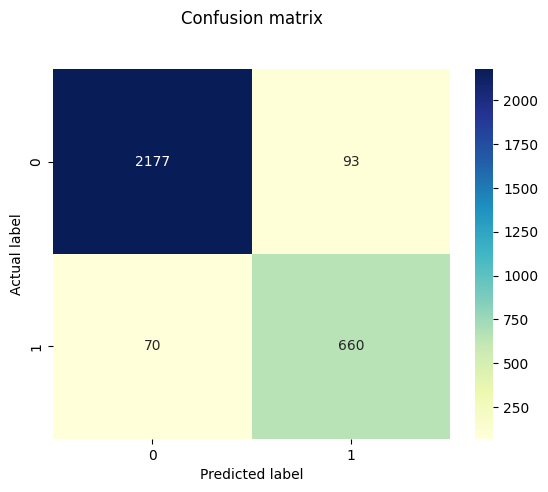

In [82]:
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [83]:
from sklearn.metrics import roc_curve

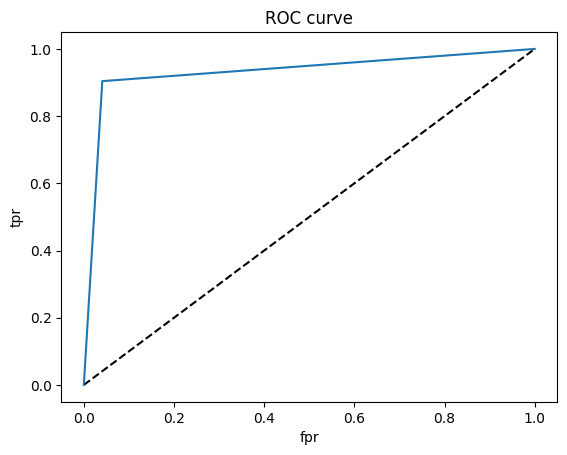

In [84]:
y_pred_proba = best_model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

In [85]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.9315702130227507

In [86]:
def plot_permutation_importance(best_model, X_train, y_train):
    from sklearn.inspection import permutation_importance
    
    # calculate permutation feature importance
    result = permutation_importance(best_model, X_train, y_train, n_repeats=10, random_state=0, n_jobs=-1)
    feature_importances = pd.Series(result.importances_mean, index=X_train.columns)

    # plot the feature importances as a horizontal bar chart
    feature_importances.sort_values(ascending=False, inplace=True)
    feature_importances.plot(kind='barh')
    
    # return feature importances as a pandas Series object
    return feature_importances

time_spend_company       0.164455
number_project           0.140962
satisfaction_level       0.139153
average_montly_hours     0.123869
salary_medium            0.063022
salary_low               0.049087
salary_high              0.019910
last_evaluation          0.015068
Work_accident            0.003425
promotion_last_5years    0.000700
dtype: float64


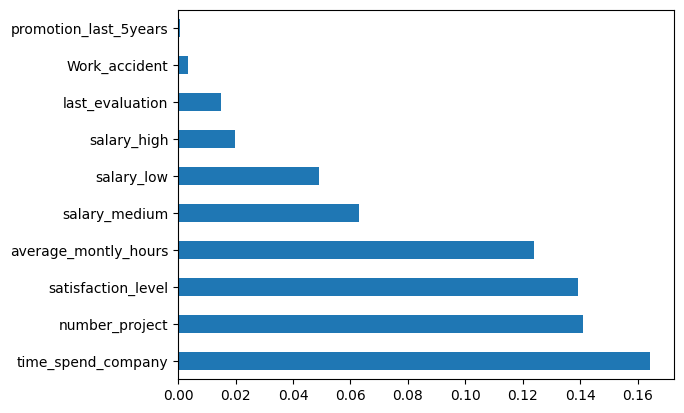

In [87]:
importances = plot_permutation_importance(best_model, X_train, y_train)
print(importances)

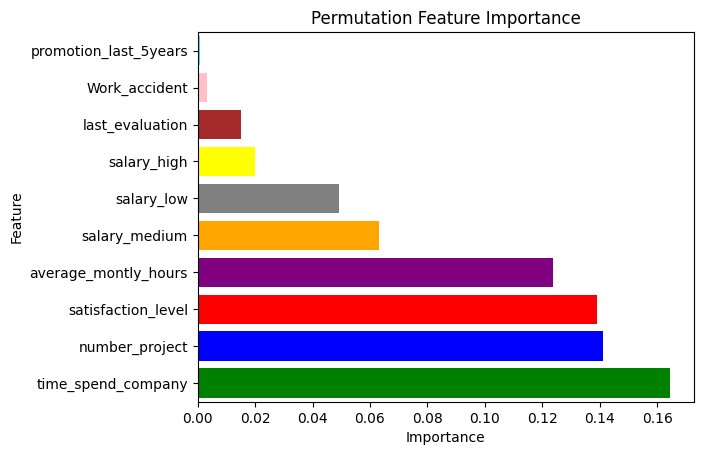

In [93]:
import matplotlib.pyplot as plt

importances = plot_permutation_importance(best_model, X_train, y_train)
plt.barh(importances.index, importances.values, color=['green', 'blue', 'red', 'purple', 'orange', 'grey', 'yellow', 'brown', 'pink', 'cyan'])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Permutation Feature Importance")
plt.show()

In [88]:
import pandas as pd

# Convert numpy array to pandas dataframe
y_train = pd.DataFrame(y_train, columns=['Attrition'])


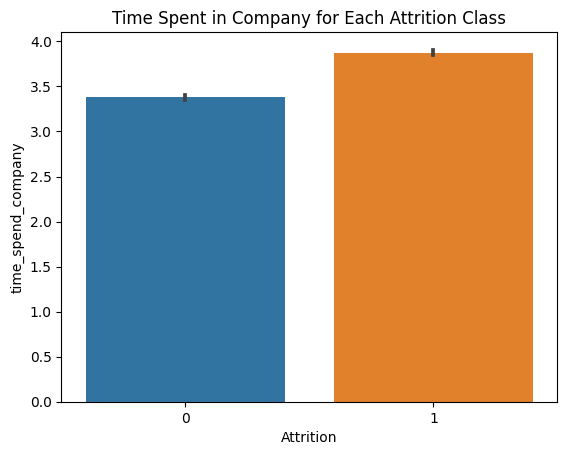

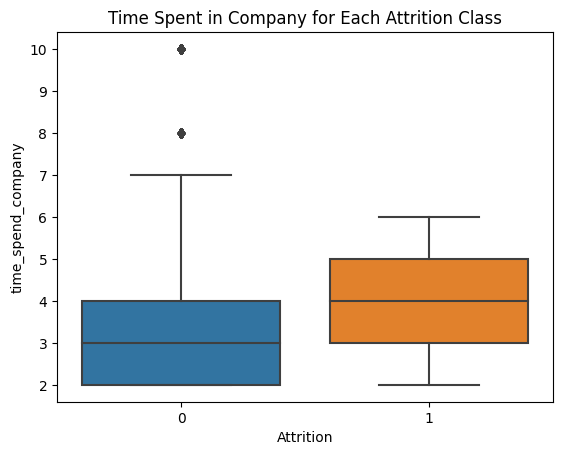

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt

# filter the data for Attrition == 0 and Attrition == 1
df_attrition_0 = df[df['Attrition'] == 0]
df_attrition_1 = df[df['Attrition'] == 1]

# plot a bar chart of time_spend_company for each Attrition class
sns.barplot(x='Attrition', y='time_spend_company', data=df)
plt.title('Time Spent in Company for Each Attrition Class')
plt.show()

# plot a box plot of time_spend_company for each Attrition class
sns.boxplot(x='Attrition', y='time_spend_company', data=df)
plt.title('Time Spent in Company for Each Attrition Class')
plt.show()


<Axes: xlabel='Attrition', ylabel='satisfaction_level'>

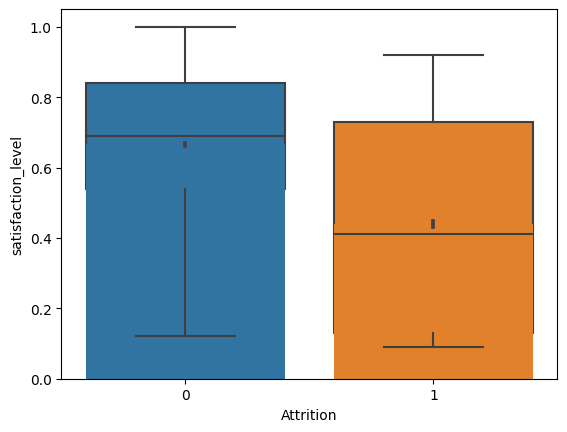

In [90]:
import seaborn as sns

# Subset the dataframe to only include Attrition = 0
attrition_0 = df[df['Attrition'] == 0]

# Subset the dataframe to only include Attrition = 1
attrition_1 = df[df['Attrition'] == 1]

# Bar chart
sns.barplot(x='Attrition', y='satisfaction_level', data=df)

# Box plot
sns.boxplot(x='Attrition', y='satisfaction_level', data=df)


<Axes: xlabel='Attrition', ylabel='number_project'>

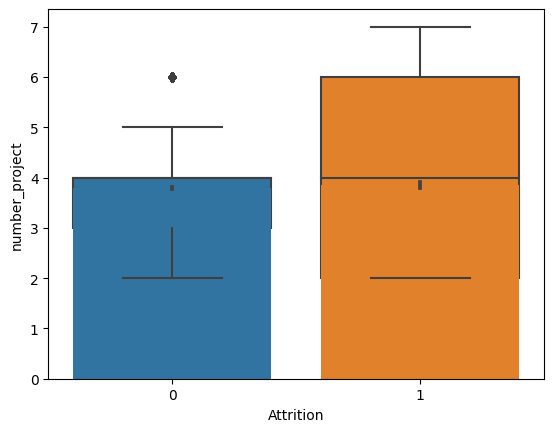

In [91]:
import seaborn as sns

# Subset the dataframe to only include Attrition = 0
attrition_0 = df[df['Attrition'] == 0]

# Subset the dataframe to only include Attrition = 1
attrition_1 = df[df['Attrition'] == 1]

# Bar chart
sns.barplot(x='Attrition', y='number_project', data=df)

# Box plot
sns.boxplot(x='Attrition', y='number_project', data=df)

<Axes: xlabel='Attrition', ylabel='average_montly_hours'>

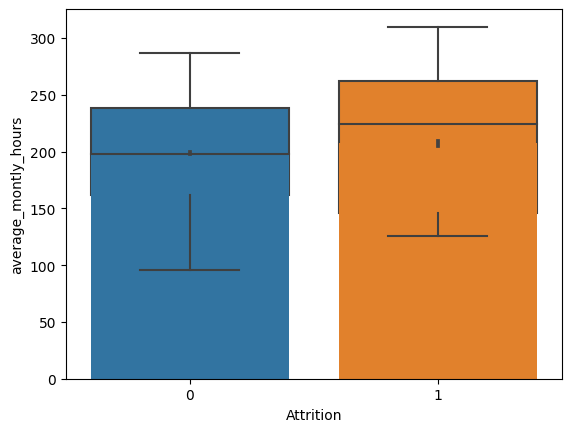

In [92]:
import seaborn as sns

# Subset the dataframe to only include Attrition = 0
attrition_0 = df[df['Attrition'] == 0]

# Subset the dataframe to only include Attrition = 1
attrition_1 = df[df['Attrition'] == 1]

# Bar chart
sns.barplot(x='Attrition', y='average_montly_hours', data=df)

# Box plot
sns.boxplot(x='Attrition', y='average_montly_hours', data=df)